In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import numpy as np

X = 6 * np.random.rand(100, 1) - 3  # Génère 100 nombres aléatoires entre -3 et 3
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100, 1)  # quadratic equation used- y=0.5x^2+1.5x+2+outliers


Text(0, 0.5, 'Y dataset')

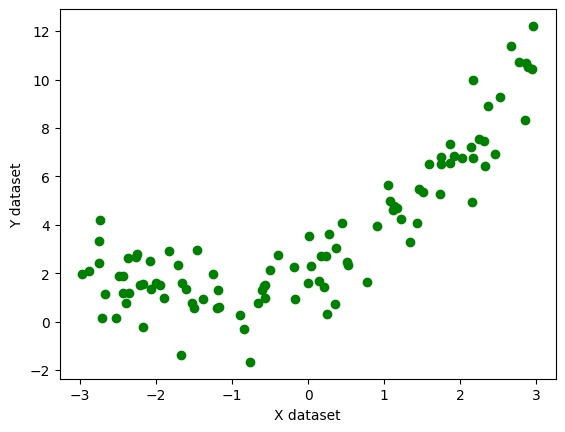

In [7]:
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
## Lets implement Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()

In [10]:
regression_1.fit(X_train,y_train)

LinearRegression()

In [11]:
from sklearn.metrics import r2_score
score=r2_score(y_test,regression_1.predict(X_test))
print(score)

0.5699164702379611


Text(0, 0.5, 'Y')

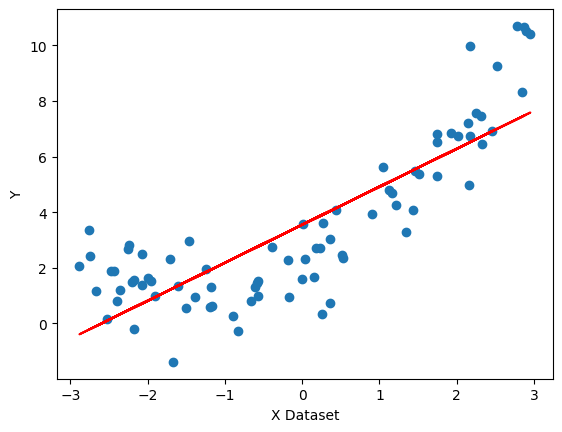

In [16]:
## Lets visualize this model
plt.plot(X_train,regression_1.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y")

In [17]:
#Lets apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [20]:
poly=PolynomialFeatures(degree=2,include_bias=True) # include the bias B
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [19]:
X_train_poly # 1 X1 X1**2

array([[ 1.00000000e+00, -1.24591113e+00,  1.55229455e+00],
       [ 1.00000000e+00, -2.66835936e+00,  7.12014167e+00],
       [ 1.00000000e+00,  1.42841922e+00,  2.04038148e+00],
       [ 1.00000000e+00,  2.78010218e+00,  7.72896814e+00],
       [ 1.00000000e+00,  2.84776659e+00,  8.10977453e+00],
       [ 1.00000000e+00, -2.36086236e+00,  5.57367108e+00],
       [ 1.00000000e+00,  4.41932695e-01,  1.95304507e-01],
       [ 1.00000000e+00,  1.04907438e+00,  1.10055706e+00],
       [ 1.00000000e+00, -1.38684968e+00,  1.92335203e+00],
       [ 1.00000000e+00,  4.20255853e-02,  1.76614982e-03],
       [ 1.00000000e+00,  2.95191575e+00,  8.71380661e+00],
       [ 1.00000000e+00,  3.60084222e-01,  1.29660647e-01],
       [ 1.00000000e+00, -1.71617511e+00,  2.94525702e+00],
       [ 1.00000000e+00, -2.40077874e+00,  5.76373857e+00],
       [ 1.00000000e+00, -1.99995229e+00,  3.99980915e+00],
       [ 1.00000000e+00,  2.33112595e-01,  5.43414821e-02],
       [ 1.00000000e+00,  5.12344396e-01

In [22]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8548786622539207


In [23]:
print(regression.coef_)

[[0.         1.35041977 0.49716847]]


In [24]:
print(regression.intercept_)

[1.9960132]


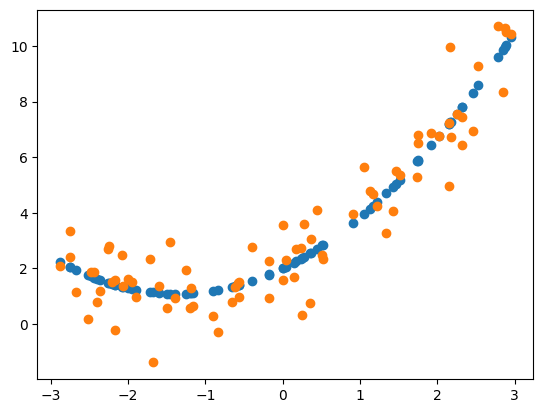

In [26]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [27]:
poly=PolynomialFeatures(degree=3,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [28]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8538638145159505


In [29]:
# Prediction of new data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

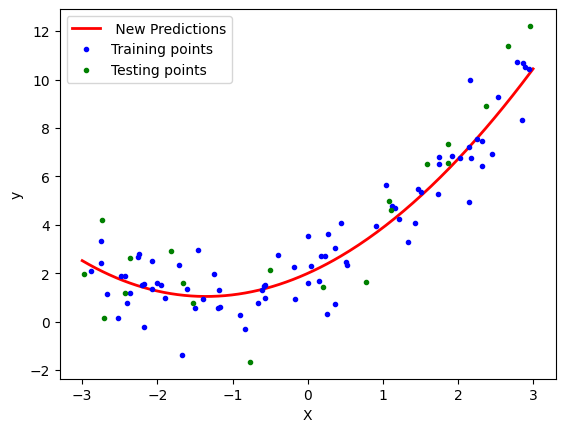

In [30]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [31]:
from sklearn.pipeline import Pipeline

In [32]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

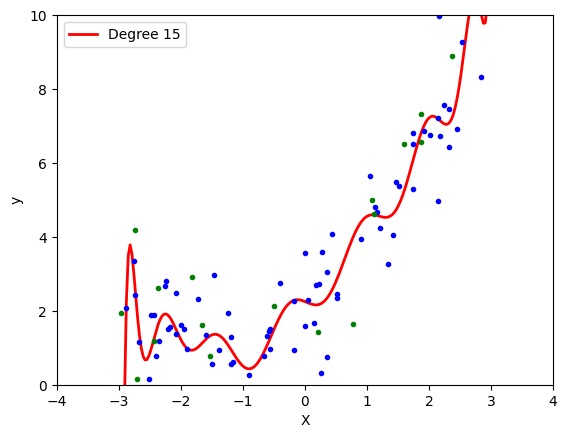

In [40]:
poly_regression(15)